<center><h1> Proyecto Final: Algoritmos de Optimización </h1></center>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/Uni-logo_transparente_granate.png" alt="Logo" width="200"/></center>

<center><h3> Curso: Algebra Lineal y Optimización Computacional </h3></center>
<center><h4> Profesor: Helder Rojas, Phd </h4></center>

**Integrantes**:

- Diego Lazo 
- Hugo Fernandez 
- Noe Camacho 


## Pregunta 1
En este problema utilizaremos el Boston Housing Dataset para predecir el precio
de las viviendas a partir de características tales como la cantidad de habitaciones,
distancia al centro laboral, entre otras características disponibles en el dataset. Con
este fin, nuestro objetivo es minimizar la función de mínimos cuadrados

$$ 
\begin{equation}
minimize_{\beta \in \mathbb{R}^p}  \| \overrightarrow{y}-\beta \overrightarrow{x} \|_{2}^2   
\end{equation}
$$ 

donde la matriz de datos $X \in \mathbb{R}^{506x13}$ contiene las características, $y \in \mathbb{R}^{506x1}$ contiene
el valor medio de las viviendas y $\beta$ contiene el vector de parámetros del modelo.
Utilice cualquier lenguaje programación de su elección (Matlab, Python, R, etc)
para minimizar la función de mínimos cuadrados y, consecuentemente, estimar los
parámetros del modelo. Para esto haga uso de los siguientes algoritmos de optimización

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv
np.set_printoptions(suppress=True)
# Cargar el conjunto de datos de Boston Housing
boston = pd.read_csv("data/BostonHousing.csv")
X = boston.drop(columns=["medv"])
y = boston["medv"]

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Agregar una columna de unos para el término de sesgo (bias)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Ejecutar los algoritmos
beta_initial = np.zeros(X.shape[1])

### a) Descenso de gradiente con condición de Armijo
El objetivo es minimizar una función objetivo $f(\mathbf{x})$ utilizando el método del descenso de gradiente con una estrategia de selección de tamaño de paso conocida como la condición de Armijo. 

**Gradiente de la Función Objetivo:**

Consideramos una función $f: \mathbb{R}^n \rightarrow \mathbb{R}$ diferenciable. El gradiente de $f$ en un punto $\mathbf{x}$ está dado por:

$$
\nabla f(\mathbf{x}) = \begin{bmatrix}
           \frac{\partial f}{\partial x_1} \\
           \frac{\partial f}{\partial x_2} \\
           \vdots \\
           \frac{\partial f}{\partial x_n}
         \end{bmatrix}
$$

Este gradiente indica la dirección de máximo incremento de $f$. El descenso de gradiente toma pasos en la dirección opuesta al gradiente para minimizar $f$.

**Algoritmo de Descenso de Gradiente con Backtracking:**

El algoritmo se inicia con un punto inicial $\mathbf{x}^{(0)}$ y parámetros $\alpha^0, \beta, \eta$, donde $\alpha^0$ es la tasa de aprendizaje inicial, $\beta$ es el factor de disminución de $\alpha$, y $\eta$ es el parámetro de Armijo. El proceso iterativo se define como sigue:

1. **Inicialización**: Establecer \(k = 0\).
2. **Iteración**: Mientras no se cumplan los criterios de convergencia:
   - Calcular $\nabla f(\mathbf{x}^{(k)})$.
   - Establecer $\alpha_k = \alpha^0$.
   - **Búsqueda de Armijo**: Repetir hasta que se cumpla:
     $$
     f(\mathbf{x}^{(k)} - \alpha_k \nabla f(\mathbf{x}^{(k)})) \leq f(\mathbf{x}^{(k)}) - \eta \alpha_k \| \nabla f(\mathbf{x}^{(k)}) \|^2
     $$
     Si no se cumple, actualizar $\alpha_k \leftarrow \beta \alpha_k$.
   - Actualizar $\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \alpha_k \nabla f(\mathbf{x}^{(k)})$.
   - Incrementar $k \leftarrow k + 1$.
3. **Terminación**: El algoritmo termina cuando el cambio en \(f\) es menor que un umbral dado o se alcanza un número máximo de iteraciones.


**Justificación de la Condición de Armijo:**


La condición de Armijo garantiza que el paso tomado es suficientemente grande para asegurar una disminución adecuada en $f$ pero no demasiado grande para evitar sobrepasar el mínimo. Matemáticamente, esta condición controla el tamaño del paso multiplicando por $\beta$ hasta que el decremento en $f$ sea proporcional al cuadrado de la norma del gradiente multiplicado por $\alpha_k$. Esto asegura la convergencia del método bajo condiciones apropiadas sobre $f$.


In [52]:
def compute_cost(X, y, beta):
    m = len(y)
    cost = (1/2*m) * np.sum((X.dot(beta) - y)**2)
    return cost

def compute_gradient(X, y, beta):
    m = len(y)
    gradient = (1/m) * X.T.dot(X.dot(beta) - y)
    return gradient

def gradient_descent_armijo(X, y, beta, alpha=0.01, max_iter=100, sigma=0.1, beta_armijo=0.7):
    m = len(y)
    cost_history = []

    for i in range(max_iter):
        gradient = compute_gradient(X, y, beta)
        cost = compute_cost(X, y, beta)

        # Condición de Armijo
        t = alpha
        while compute_cost(X, y, beta - t * gradient) > cost - sigma * t * np.dot(gradient.T, gradient):
            t *= beta_armijo

        beta = beta - t * gradient
        cost_history.append(cost)


    return beta, cost_history

Beta de Armijo: [14.28507047 -0.59432378  0.45391803 -0.56129831  0.7858901  -0.43633501
  2.5763949  -0.25049398 -0.67330639 -0.02827091 -0.49865537 -1.43964845
  0.66126887 -2.27355929]


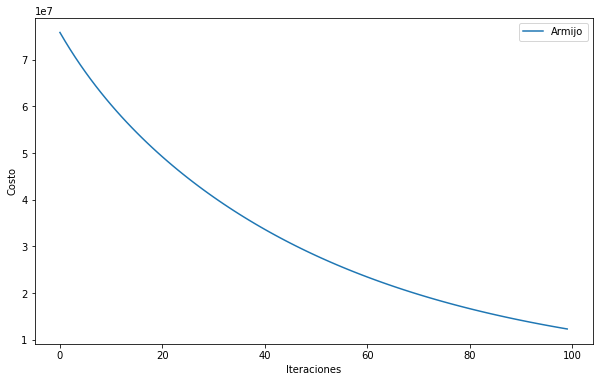

In [53]:
beta_armijo, cost_history_armijo = gradient_descent_armijo(X, y, beta_initial)
print("Beta de Armijo:", beta_armijo)
# Graficar la convergencia de los tres métodos
plt.figure(figsize=(10, 6))
plt.plot(cost_history_armijo, label="Armijo")
plt.xlabel("Iteraciones")
plt.ylabel("Costo")
plt.legend()
plt.show()

### b) Descenso de Gradiente Estocástico (SGD)

El **Descenso de Gradiente Estocástico (SGD)** es una variación del método de descenso de gradiente que utiliza un subconjunto aleatorio de los datos en cada iteración en lugar de todo el conjunto de datos. Esto lo hace especialmente útil para datasets grandes donde el cálculo del gradiente completo puede ser computacionalmente costoso.

#### Algoritmo de SGD

El SGD realiza actualizaciones más frecuentes del modelo con un costo computacional más bajo por actualización. El algoritmo puede describirse de la siguiente manera:

1. **Inicialización**: Comenzar con un vector de parámetros inicial $\mathbf{\beta}^{(0)}$ y una tasa de aprendizaje $\alpha$.

2. **Iteración sobre los datos**:
   - Para cada iteración $k$, seleccionar al azar un subconjunto (mini-batch) de los datos de tamaño $m$.
   - Calcular el gradiente de la función de pérdida $J$ respecto a $\mathbf{\beta}$ usando solo este subconjunto de datos:
     $$
     \nabla J(\mathbf{\beta}^{(k)}) = \frac{1}{m} \sum_{i \in \text{mini-batch}} \nabla_{\mathbf{\beta}} \text{loss}(\mathbf{x}_i, y_i, \mathbf{\beta})
     $$
   - Actualizar los parámetros:
     $$
     \mathbf{\beta}^{(k+1)} = \mathbf{\beta}^{(k)} - \alpha \nabla J(\mathbf{\beta}^{(k)})
     $$

3. **Repetir** hasta que se cumpla un criterio de parada (por ejemplo, un número máximo de iteraciones, o un umbral de mejora en la función de pérdida).

#### Ventajas del SGD

- **Eficiencia**: El SGD es computacionalmente más eficiente que el descenso de gradiente completo, especialmente para datasets grandes.
- **Convergencia Rápida**: Puede converger más rápidamente hacia un mínimo local (o global en casos convexos) gracias a actualizaciones más frecuentes.
- **Escapar de Mínimos Locales**: La naturaleza estocástica del algoritmo puede ayudar a escapar de mínimos locales, proporcionando una mejor generalización sobre datos no vistos.

#### Desventajas del SGD

- **Variabilidad en el Proceso de Entrenamiento**: Las actualizaciones de los parámetros pueden ser muy variables debido al muestreo aleatorio, lo que puede hacer que la trayectoria del algoritmo sea muy errática.
- **Necesidad de Ajustar la Tasa de Aprendizaje**: La tasa de aprendizaje $\alpha$ puede necesitar ser ajustada durante el entrenamiento para asegurar la convergencia, a menudo disminuyendo a lo largo del tiempo.

Este método es ampliamente utilizado en problemas de aprendizaje automático, especialmente en el entrenamiento de redes neuronales, donde la eficiencia y la efectividad en el manejo de grandes volúmenes de datos son cruciales.


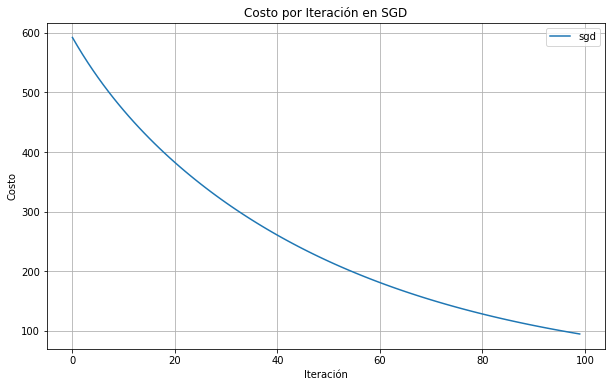

In [56]:
def sgd_with_cost_tracking(X, y, feature_names, batch_size=20, learning_rate=0.01, epochs=100):
    m, n = X.shape
    beta = np.zeros(n)  # Inicializar beta
    cost_history = []  # Para almacenar el costo por iteración
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_i = X_shuffled[i:i + batch_size]
            y_i = y_shuffled[i:i + batch_size]
            y_pred_i = X_i @ beta
            error_i = y_pred_i - y_i
            gradient_i = (2 * X_i.T @ error_i) / batch_size
            beta -= learning_rate * gradient_i
            # Calcular y almacenar el costo
            cost = np.mean(error_i**2)
            cost_history.append(cost)
    return beta, cost_history

# Nombres de las características
feature_names = list(boston.drop(columns=["medv"]).columns)

# Ejecutar la función con seguimiento de costos
beta_result, cost_history = sgd_with_cost_tracking(X, y, feature_names, batch_size=1000)

# Graficar el costo por iteración
plt.figure(figsize=(10, 6))
plt.plot(cost_history, label='sgd')
# plt.plot(cost_history_armijo, label="Armijo")
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.title('Costo por Iteración en SGD')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
pd.DataFrame({
        'Vars': ['intercept'] + feature_names,
        'Coef': beta_result})

,Vars,Coef
0,intercept,14.384446
1,crim,-0.594479
2,zn,0.453477
3,indus,-0.559912
4,chas,0.789011
5,nox,-0.436167
6,rm,2.589084
7,age,-0.248369
8,dis,-0.683737
9,rad,-0.022360


### c) Método de Newton
Conocido también como Newton-Rapshon, se desarrolló originalmente para encontrar la raíz de funciones no lineales, donde dado una función $f: \mathbb{R} \rightarrow \mathbb{R}$ suave y $f \in C^ \infty $ .Se busca encontrar $x^*$ tal que $f(x^*)$. Aplicando aproximación por serie de Taylor $f(x) = P_{n,x_0}(x)+O((x-x_0)^{n+1})$ que tiene la siguiente forma:
$$f(x+h) = f(x) + f^{'}(x)(h) + O(h)$$
$$0 \approx f(x) + f^{'}(x)(h) $$
$$ x^*-x=h=-\frac{f(x)}{f^{'}(x)}$$
$$x_{k+1}=x_k-\frac{f(x_k)}{f^{'}(x_k)}$$
Generalizando para el caso de $F: \mathbb{R}^n \rightarrow \mathbb{R}^m$, con $h \in \mathbb{R}^n$ y $ \nabla F(x) \in \mathbb{R}^{mxn}$
$$x_{k+1}=x_k-[\nabla F(x_k)]^{-1} F(x_k)$$

Para el caso de minimización de una función:  $min_{x \in \mathbb{R^n}} f(x)$, se fue convertir en un problema de encontrar la raiz, tal que $\nabla f(x)=0$ donde $\nabla f(x):\mathbb{R}^{n} \rightarrow \mathbb{R} $ y $\nabla^2f(x) = H_{(x)}$, reemplazando en la ecuación anterior se tendria que:
$$\nabla f(x) +  \nabla^2 f(x)h=0$$
$$ x_{k+1}=x_k - [\nabla^2 f(x_k)]^{-1}\nabla f(x_k)$$ 
como $\nabla^2 f$ es definida positiva y si $\nabla^2 f(x_k)$ es invertible se tiene que es direccion de descenso: 
$$ -\nabla f(x_k) ^T[\nabla^2 f(x_k)]^{-1}\nabla f(x_k) < 0 $$


Para nuestra funcion objetivo (1), $\eta=\frac{1}{2}$ se aplica el método de Newton-Raphson:
$$ f(x) = \frac{1}{2}\| \overrightarrow{y}-\beta \overrightarrow{x} \|_{2}^2   $$
$$ f(x) = \frac{1}{2}(Y-X\beta)^T(Y-X\beta)$$
$$ f(x) = \frac{1}{2}(Y^T-\beta^TX^T)(Y-x\beta)$$
$$ f(x) = \frac{1}{2}(Y^TY- Y^TX\beta-\beta^TX^TY+\beta^TX^TX\beta)$$
$$ f(x) = \frac{1}{2}(Y^TY- 2\beta^TX^TY+\beta^TX^TX\beta)$$


De manera que la gradiente y la hessiana con respecto a $\beta$ tienen la siguiente forma:


$$\nabla f(x)=\frac{1}{2}(-2X^TY+2X^TX\beta)$$
$$\nabla^2 f(x)=-X^T(Y-X\beta)$$

$$H_{\beta}=\nabla^2 f(x)= X^TX$$

Luego, reemplazando lo anterior en $ x_{k+1}=x_k - [\nabla^2 f(x_k)]^{-1}\nabla f(x_k)$ se tiene lo siguiente

$$\beta^{k+1}=\beta^{k}+(X^TX)^{-1}X^T(Y-X\beta)$$



#### Algoritmo del Método de Newton

El método de Newton actualiza los parámetros utilizando tanto el gradiente como la matriz Hessiana de la función objetivo, lo cual permite hacer ajustes más informados sobre la dirección y tamaño del paso. El algoritmo puede describirse de la siguiente manera:

1. **Inicialización**: Comenzar con un vector de parámetros inicial $\mathbf{\beta}^{(0)}$.

2. **Iteración**:
   - Para cada iteración $k$:
     - Calcular el gradiente $\nabla f(\mathbf{\beta}^{(k)})$ y la matriz Hessiana $H(\mathbf{\beta}^{(k)})$ de la función objetivo $f$ en $\mathbf{\beta}^{(k)}$:
       $$
       \nabla f(\mathbf{\beta}^{(k)}) = \begin{bmatrix}
           \frac{\partial f}{\partial \beta_1} \\
           \vdots \\
           \frac{\partial f}{\partial \beta_n}
       \end{bmatrix}, \quad
       H(\mathbf{\beta}^{(k)}) = \begin{bmatrix}
           \frac{\partial^2 f}{\partial \beta_1^2} & \cdots & \frac{\partial^2 f}{\partial \beta_1 \partial \beta_n} \\
           \vdots & \ddots & \vdots \\
           \frac{\partial^2 f}{\partial \beta_n \partial \beta_1} & \cdots & \frac{\partial^2 f}{\partial \beta_n^2}
       \end{bmatrix}
       $$
     - Actualizar los parámetros utilizando la relación:
       $$
       \mathbf{\beta}^{(k+1)} = \mathbf{\beta}^{(k)} - H(\mathbf{\beta}^{(k)})^{-1} \nabla f(\mathbf{\beta}^{(k)})
       $$

3. **Repetir** hasta que $\| \nabla f(\beta) \|< tolerancia$

In [58]:
#Algoritmo de  Newton-Raphson
varnm=list(boston.drop(columns=["medv"]).columns)
varnm.insert(0, "intercept")
def newton_raphson(y,x,b0,tol=1e-6,max_iter=100):
    b=b0
    for i in range(0,max_iter,1):
        grad=np.dot(np.transpose(x),y-np.dot(x,b))
        hess=inv(np.dot(np.transpose(x),x))
        bnew=b+np.dot(hess,grad)
        if np.sqrt(np.sum(grad**2))<tol: 
            break
        b=bnew
    print('Convergencia en '+ str(i),' iteraciones')
    r=pd.DataFrame({"Vars":varnm,"Coef":b})
    return(r)

newton_raphson(y,X,beta_initial)

Convergencia en 1  iteraciones


,Vars,Coef
0,intercept,22.532806
1,crim,-0.928146
2,zn,1.081569
3,indus,0.140900
4,chas,0.681740
5,nox,-2.056718
6,rm,2.674230
7,age,0.019466
8,dis,-3.104044
9,rad,2.662218


In [ ]:
# Cargar el conjunto de datos de Boston Housing
boston = pd.read_csv("data/BostonHousing.csv")
X = boston.drop(columns=["medv"])
y = boston["medv"]

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Agregar una columna de unos para el término de sesgo (bias)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Ejecutar los algoritmos
beta_initial = np.zeros(X.shape[1])

# beta_armijo, cost_history_armijo = gradient_descent_armijo(X, y, beta_initial)
# beta_sgd, cost_history_sgd = sgd_with_cost_tracking(X, y, beta_initial)
# beta_newton, cost_history_newton = newton_raphson(X, y, beta_initial)

# # Graficar la convergencia de los tres métodos
# plt.plot(cost_history_armijo, label="Armijo")
# plt.plot(cost_history_sgd, label="SGD")
# plt.plot(cost_history_newton, label="Newton")
# plt.xlabel("Iteraciones")
# plt.ylabel("Costo")
# plt.legend()
# plt.show()

## Pregunta 2
En este problema, utilizaremos el Smarket Dataset para predecir la dirección de la variación de precios del mercado (Up o Down) en función de características tales como los retornos desfasados (Lags), volúmenes de negociación, entre otras características disponibles en el dataset. Por tanto, nuestro objetivo es maximizar la función de log-verosimilitud de la regresión logística:

$$
\max_{\beta \in \mathbb{R}^p} \sum_{i=1}^{1250} y^{(i)} \log g \left( \langle \mathbf{x}^{(i)}, \mathbf{\beta} \rangle \right) + (1 - y^{(i)}) \log \left( 1 - g \left( \langle \mathbf{x}^{(i)}, \mathbf{\beta} \rangle \right) \right),
$$

donde $g(t) = (1 + \exp^{-t})^{-1}$ es la función logística, los labels $y^{(i)}, 1 \leq i \leq 1250$, son 1 (Up) o 0 (Down), $\mathbf{\beta}$ contiene los parámetros del modelo, y las características $\mathbf{x}^{(i)}$ son vectores en $\mathbb{R}^7$.


In [61]:
df = pd.read_csv("data/StockMarket.csv")
y = df['Direction'].apply(lambda x: 1 if x == 'Up' else 0)
X = df.drop(columns=['Direction'])

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Agregar una columna de unos para el término de sesgo (bias)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Ejecutar los algoritmos
beta_initial = np.zeros(X.shape[1])

### a) Descenso de Gradiente con Condición de Armijo para Regresión Logística

El objetivo es maximizar la función de log-verosimilitud en el contexto de la regresión logística, que es la función objetivo comúnmente usada para la clasificación binaria. La formulación matemática de la función de log-verosimilitud $ L(\beta) $ y su gradiente se detalla a continuación:

#### Función de Log-verosimilitud
La función de log-verosimilitud para la regresión logística se define como:

$$
L(\beta) = \sum_{i=1}^{1250} \left[ y^{(i)} \log(g(\mathbf{x}^{(i)} \cdot \beta)) + (1 - y^{(i)}) \log(1 - g(\mathbf{x}^{(i)} \cdot \beta)) \right]
$$

donde $g(t) = \frac{1}{1 + e^{-t}} $ es la función sigmoide, $ \beta $ son los parámetros del modelo, $ \mathbf{x}^{(i)} $ son las características de entrada, y $ y^{(i)} $ son las etiquetas de salida (0 o 1).

#### Gradiente de la Función de Log-verosimilitud
El gradiente de la función de log-verosimilitud con respecto a los parámetros $ \beta $ es crucial para la aplicación del método de descenso de gradiente y se calcula como:

$$
\nabla L(\beta) = \sum_{i=1}^{1250} \left[ y^{(i)} - g(\mathbf{x}^{(i)} \cdot \beta) \right] \mathbf{x}^{(i)}
$$

#### Algoritmo de Descenso de Gradiente con Condición de Armijo
El método de descenso de gradiente actualiza iterativamente los parámetros en la dirección que maximiza la función de log-verosimilitud. La condición de Armijo se utiliza para asegurar que cada paso proporciona una mejora adecuada. Los pasos del algoritmo son:

1. **Inicialización:** Seleccionar un valor inicial para $ \beta $ y establecer parámetros como el tamaño del paso inicial $ \alpha $, $ \sigma $ (control de mejora de Armijo), y $ \gamma $ (factor de reducción del tamaño del paso).
2. **Iteración:**
   - Calcular el gradiente $ \nabla L(\beta^{(k)}) $.
   - Ajustar $ \alpha $ según la condición de Armijo hasta que:
     $$
     L(\beta^{(k)} + \alpha \nabla L(\beta^{(k)})) \geq L(\beta^{(k)}) + \sigma \alpha \nabla L(\beta^{(k)})^T \nabla L(\beta^{(k)})
     $$
   - Actualizar $ \beta $ como $ \beta^{(k+1)} = \beta^{(k)} + \alpha \nabla L(\beta^{(k)}) $.
   - Repetir hasta la convergencia o alcanzar un máximo de iteraciones.

La selección de $ \sigma $, $ \gamma $, y $ \alpha $ afecta directamente la eficiencia del algoritmo y su capacidad para encontrar el máximo global de la función de log-verosimilitud.


In [64]:
import numpy as np

def sigmoid(z):
    # Evita el desbordamiento de exp para valores negativos y positivos extremos
    pos_mask = z >= 0
    neg_mask = ~pos_mask
    result = np.zeros_like(z, dtype=np.float64)

    # Para z >= 0
    result[pos_mask] = 1 / (1 + np.exp(-z[pos_mask]))

    # Para z < 0, utiliza una forma diferente para evitar overflow
    exp_z = np.exp(z[neg_mask])
    result[neg_mask] = exp_z / (1 + exp_z)
    
    return result

def log_likelihood(X, y, beta):
    z = np.dot(X, beta)
    predictions = sigmoid(z)
    # Clip para evitar log(0)
    predictions = np.clip(predictions, 1e-15, 1 - 1e-15)
    ll = np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return ll

def gradient(X, y, beta):
    z = np.dot(X, beta)
    return np.dot(X.T, (y - sigmoid(z)))

def gradient_descent_armijo(X, y, beta, alpha=1, sigma=0.1, gamma=0.5, max_iter=100):
    ll_old = -np.inf
    ll_history = []  # para almacenar el historial de log-verosimilitud
    for i in range(max_iter):
        grad = gradient(X, y, beta)
        while True:
            beta_new = beta + alpha * grad
            ll_new = log_likelihood(X, y, beta_new)
            if ll_new < ll_old + sigma * alpha * np.dot(grad, grad):
                alpha *= gamma
            else:
                break
        beta = beta_new
        ll_history.append(ll_new)  # Guardar el valor de log-verosimilitud
        if np.abs(ll_new - ll_old) < 1e-6:
            break
        ll_old = ll_new
    return beta, ll_history

Beta de Armijo [  1.55394375   3.06389166  -1.41352994  -0.33255284  -2.49437606
   0.73912675  -0.27957062   0.68079425 460.10537326]


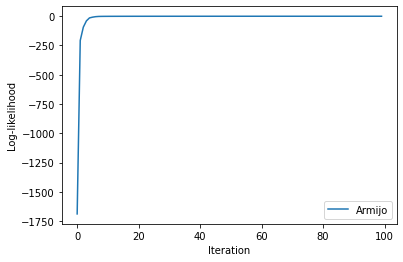

In [65]:
# Ejecutar Descenso de Gradiente con Condición de Armijo
beta_optimized, log_likelihood_history  = gradient_descent_armijo(X, y, beta_initial)

# Visualización de la convergencia
plt.plot(log_likelihood_history, label='Armijo')
print("Beta de Armijo", beta_optimized)
plt.xlabel('Iteration')
plt.ylabel('Log-likelihood')
plt.legend()
plt.show()

### b) Descenso de Gradiente Estocástico (Stochastic Gradient Descent, SGD)

El Descenso de Gradiente Estocástico es una variante del Descenso de Gradiente que en lugar de calcular el gradiente de la función de costo con respecto a todos los ejemplos en el dataset (lo cual puede ser computacionalmente muy costoso), calcula este gradiente utilizando solo un subconjunto de los datos (un batch) en cada iteración. Esto implica que en cada paso se utiliza una estimación del gradiente verdadero basada en una fracción del dataset, lo que introduce ruido en el proceso de optimización pero permite realizar actualizaciones más frecuentes y con menos carga computacional.


Dada la función de log-verosimilitud de la regresión logística:
$$
L(\beta) = \sum_{i=1}^{1250} \left( y^{(i)} \log g \left( x^{(i)T} \beta \right) + (1 - y^{(i)}) \log \left( 1 - g \left( x^{(i)T} \beta \right) \right) \right)
$$
Donde $( g(t) = \frac{1}{1 + e^{-t}} )$ es la función logística.

El gradiente de $(L)$ con respecto a $(\beta)$ es:
$$
\nabla_\beta L(\beta) = \sum_{i=1}^{1250} \left( y^{(i)} - g \left( x^{(i)T} \beta \right) \right) x^{(i)}
$$

En SGD, el gradiente $(\nabla L)$ se aproxima utilizando un batch de $(m)$ ejemplos aleatorios $({(x^{(i)}, y^{(i)})})$:
$$
\nabla_{\beta_{\text{batch}}} L(\beta) = \frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} - g \left( x^{(i)T} \beta \right) \right) x^{(i)}
$$

Y la regla de actualización para $(\beta)$ es:
$$
\beta \leftarrow \beta + \eta \nabla_{\beta_{\text{batch}}} L(\beta)
$$
Donde $(\eta)$ es la tasa de aprendizaje

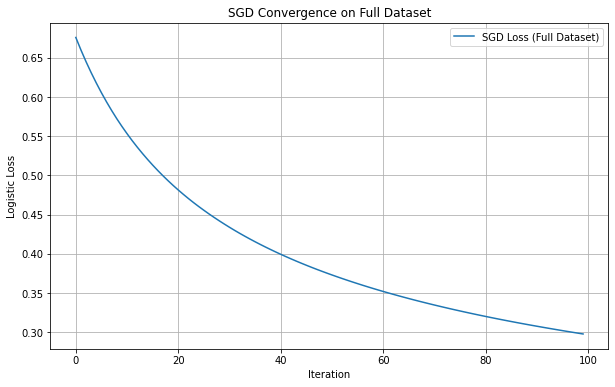

In [81]:
# Función de la sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función para calcular el gradiente
def compute_gradient(X, y, beta):
    predictions = sigmoid(X @ beta)
    errors = y - predictions
    gradient = -X.T @ errors / len(X)
    return gradient, errors

# Parámetros del SGD
eta = 0.01  # Tasa de aprendizaje
n_iterations = 100
batch_size = 100
n_batches = int(np.ceil(len(X) / batch_size))

# Inicialización de beta
beta = np.zeros(X.shape[1])

# Para almacenar el progreso de la pérdida
loss_progress = []

# Algoritmo SGD utilizando todo el dataset
for iteration in range(n_iterations):
    indices = np.random.permutation(len(X))
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    for i in range(n_batches):
        xi = X_shuffled[i * batch_size:(i + 1) * batch_size]
        yi = y_shuffled[i * batch_size:(i + 1) * batch_size]
        
        gradient, _ = compute_gradient(xi, yi, beta)
        beta -= eta * gradient
    
    # Cálculo de la pérdida logística con todo el dataset
    _, batch_errors = compute_gradient(X, y, beta)
    loss = -np.mean(y * np.log(sigmoid(X @ beta) + 1e-10) +
                    (1 - y) * np.log(1 - sigmoid(X @ beta) + 1e-10))
    loss_progress.append(loss)

# Graficar la convergencia del modelo con todo el dataset
plt.figure(figsize=(10, 6))
plt.plot(loss_progress, label='SGD Loss (Full Dataset)')
plt.xlabel('Iteration')
plt.ylabel('Logistic Loss')
plt.title('SGD Convergence on Full Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
pd.DataFrame({
        'Vars': df.columns.tolist(),
        'Coef': beta})

,Vars,Coef
0,Year,0.085924
1,Lag1,0.135062
2,Lag2,-0.061125
3,Lag3,-0.061181
4,Lag4,0.021475
5,Lag5,0.003001
6,Volume,0.036886
7,Today,-0.012298
8,Direction,2.073558


### c) Método de Newton

Siguiendo lo antes expuesto, se tiene que determinar  $\nabla L(\beta_k)$ y  $\nabla^2 L(\beta_k)$, de la funcion de log-verosimilitud
$$ \beta^{(k+1)}=\beta^{(k)} - [\nabla^2 L(\beta^{(k)}]^{-1}\nabla L(\beta^k)$$


De los metodos anteriores se tiene que:

$$
\nabla L(\beta) = \sum_{i=1}^{1250} \left[ y^{(i)} - g(\mathbf{x}^{(i)} \cdot \beta) \right] \mathbf{x}^{(i)}
$$
$$
\nabla^2 L(\beta) = \sum_{i=1}^{1250}  g(\mathbf{x}^{(i)} \cdot \beta) (1-g(\mathbf{x}^{(i)}\cdot\beta)) \mathbf{x_k}^{(i)} \mathbf{x_r}^{(i)}
$$


#### Algoritmo de Newton
1. **Inicialización:** Seleccionar un valor inicial para $ \beta $ , un numero máximo de iteraciones y una tolerancia como criterio de parada
2. **Iteración:**
   - Calcular el gradiente $ \nabla L(\beta^{(k)}) $.
   - Calcular la hessiana  $ \nabla^2 L(\beta^{(k)}) $.
   - Actualizar $ \beta^{(k+1)}=\beta^{(k)} - [\nabla^2 L(\beta^{(k)}]^{-1}\nabla L(\beta^k)$
   - Repetir hasta la convergencia o alcanzar un máximo de iteraciones.


In [76]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_likelihood(X, y, beta):
    z = np.dot(X, beta)
    return np.sum(y * z - np.log(1 + np.exp(z)))

def gradient(X, y, beta):
    z = np.dot(X, beta)
    return np.dot(X.T, y - sigmoid(z))

def hessian(X, beta, lambda_reg=1e-5):
    z = np.dot(X, beta)
    S = sigmoid(z) * (1 - sigmoid(z))
    H = np.dot(X.T * S, X)
    H += np.eye(H.shape[0]) * lambda_reg  # Add regularization term
    return H

def newton_raphson(X, y, max_iter=1000, tol=1e-5):
    beta = np.zeros(X.shape[1])
    for _ in range(max_iter):
        grad = gradient(X, y, beta)
        H = hessian(X, beta)
        delta = np.linalg.solve(H, grad)
        beta += delta
        
        # Check for convergence
        if np.linalg.norm(delta) < tol:
            break
    return beta

In [77]:
 # Perform Newton-Raphson method
beta = newton_raphson(X, y)
print("coeficientes estimados:", beta)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18104\3423516255.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


coeficientes estimados: [   7.11945435   15.8956863    -6.35558503   -7.75141426  -20.78888119
   -1.79884094   -0.90300561    3.63568128 2235.76584661]
